<a href="https://colab.research.google.com/github/vtecftwy/metagenomics/blob/refactor_cnn_virus/nbs/2_02_EC_train_cnn_virus_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train CNN_Virus code with original dataset

Original code is [here](https://github.com/MaHaoran627/CNN_Virus)

If you run this notebook locally, first install the latest version of `metagentools`:
- `pip install -U metagenomics`

If you run it on Colab, it will be done automatically.

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
from pathlib import Path
from ecutilities.ipython import nb_setup
from metagentools.core import ProjectFileSystem
from metagentools.cnn_virus.architecture import create_model_original
from metagentools.cnn_virus.data import get_learning_weights, get_params_50mer, get_kmer_from_50mer
from metagentools.cnn_virus.data import DataGenerator_from_50mer

nb_setup()

Set autoreload mode


In [2]:
pfs = ProjectFileSystem()

if pfs.is_colab:
    print('Running on colab')
    print('Installing custom project code')   
    !pip install -Uqq metagentools

else:
    print('Running locally')
    print('Make sure you have installed `metagentools` in your environment, if not `pip install -Uqq metagentools`')

p2data = pfs.data
assert p2data.is_dir()

Running locally
Make sure you have installed `metagentools` in your environment, if not `pip install -Uqq metagentools`


# Import custom code and setup paths

In [ ]:
# from src.utils import TrainingExperiment

In [9]:
#path for the training file
filepath_train = p2data /"CNN_Virus_data/50mer_training"
assert filepath_train.is_file(), filepath_train
#path for the validating file
filepath_val = p2data / "CNN_Virus_data/50mer_validating"
assert filepath_val.is_file(), filepath_val
#path for the learning weights file
filepath_weights = p2data / "CNN_Virus_data/weight_of_classes"
assert filepath_weights.is_file(), filepath_weights

# Preprocess data and create generators

In [11]:
d_nucl={"A":0,"C":1,"G":2,"T":3,"N":4}

# max_seqs = 10_000_000
max_seqs = 10_000
f_matrix,f_labels,f_pos=get_kmer_from_50mer(filepath_train, max_seqs=max_seqs)
f_matrix_val,f_labels_val,f_pos_val=get_kmer_from_50mer(filepath_val, max_seqs=int(max_seqs * 0.2))

params = get_params_50mer()
params['batch_size'] = 4096
display(params)
d_weights=get_learning_weights(filepath_weights)

training_generator = DataGenerator_from_50mer(f_matrix, f_labels, f_pos, **params)
val_generator = DataGenerator_from_50mer(f_matrix_val, f_labels_val, f_pos_val, **params)

{'batch_size': 4096, 'n_classes': 187, 'shuffle': True}

# Build model and review it

In [12]:
model = create_model_original()
model.summary()

Creating CNN Model (Original)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input-seq (InputLayer)         [(None, 50, 5)]      0           []                               
                                                                                                  
 conv-1 (Conv1D)                (None, 50, 512)      13312       ['input-seq[0][0]']              
                                                                                                  
 bn-1 (BatchNormalization)      (None, 50, 512)      2048        ['conv-1[0][0]']                 
                                                                                                  
 maxpool-1 (MaxPooling1D)       (None, 25, 512)      0           ['bn-1[0][0]']                   
                                                                

# Run Training Experiment

First training experiment: after 2 epochs:

- Time: `3439.13s/epoch`
- Training Losses: `loss=1.7, output1_loss=0.918, output2_loss=0.78`
- Validation Losses: `val_loss=1.6, val_output1_loss=0.869, val_output2_loss=0.73`
- Training Accuracy: `output1_accuracy=0.705, output2_accuracy=0.741`
- Validation Accuracy: `val_output1_accuracy=0.723, val_output2_accuracy=0.756`


In [ ]:
exp = TrainingExperiment(
    name='EC_2_10Mseq', 
    train_ds=training_generator, 
    val_ds=val_generator,
    p2drive=p2drive
)

Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt
Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt
Experiment EC_2_10Mseq ready.
Models will be saved in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus


In [ ]:
exp.add_comment_to_description_file('training set with 10,000,000 sequences')

Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt


In [ ]:
txt = """Experiment Notes:
The previous experiment (EC_1_1Mseq) started overfitting after 10 epochs. Probably because a misfit between the nbr of train and val datesets.
This experiment uses the first 10,000,000 training samples, all validation samples, but not using the class weights.
"""
exp.add_comment_to_description_file(txt)

Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt


In [ ]:
txt = """Plan:
Each run in this experiment will only inclide one epoch to ensure saving intermediate models. even if colab shuts down. 
One epoch takes 1 hr !
"""
exp.add_comment_to_description_file(txt)

Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt


In [ ]:
exp.run_epochs(lr=1e-3, epochs=1)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt
Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt
Saved model and losses in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus as 
 - EC_2_10Mseq--220902-0456-UTC-model-001
 - EC_2_10Mseq--220902-0456-UTC-losses-001.json


In [ ]:
exp.run_epochs(lr=1e-3, epochs=1)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt
Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt
Saved model and losses in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus as 
 - EC_2_10Mseq--220902-0456-UTC-model-002
 - EC_2_10Mseq--220902-0456-UTC-losses-002.json


In [ ]:
exp.run_epochs(lr=1e-3, epochs=1)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt
Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt
Saved model and losses in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus as 
 - EC_2_10Mseq--220902-0456-UTC-model-003
 - EC_2_10Mseq--220902-0456-UTC-losses-003.json


In [ ]:
exp.run_epochs(lr=1e-3, epochs=1)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt
Experiment Description updated in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus/EC_2_10Mseq-220902-0456-UTC--description.txt
Saved model and losses in /content/gdrive/MyDrive/Metagenonics/saved/cnn_virus as 
 - EC_2_10Mseq--220902-1326-UTC-model-004
 - EC_2_10Mseq--220902-1326-UTC-losses-004.json


In [ ]:
exp.run_epochs(lr=1e-3, epochs=1)

In [ ]:
exp.run_epochs(lr=1e-3, epochs=1)

# Plot Saved Losses

In [ ]:
p2saved = p2drive / 'saved/cnn_virus'
assert p2saved.is_dir()

loss_files = [f for f in p2saved.glob('*-losses-*.json')]
print('\n'.join([f.name for f in loss_files]))

EC_1_1Mseq--220831-1730-UTC-losses-001.json
EC_1_1Mseq--220831-1747-UTC-losses-002.json
EC_1_1Mseq--220901-0351-UTC-losses-003.json


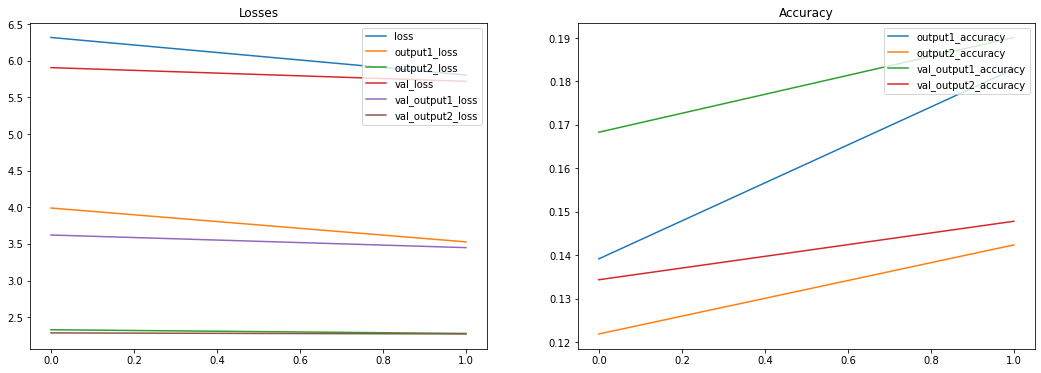

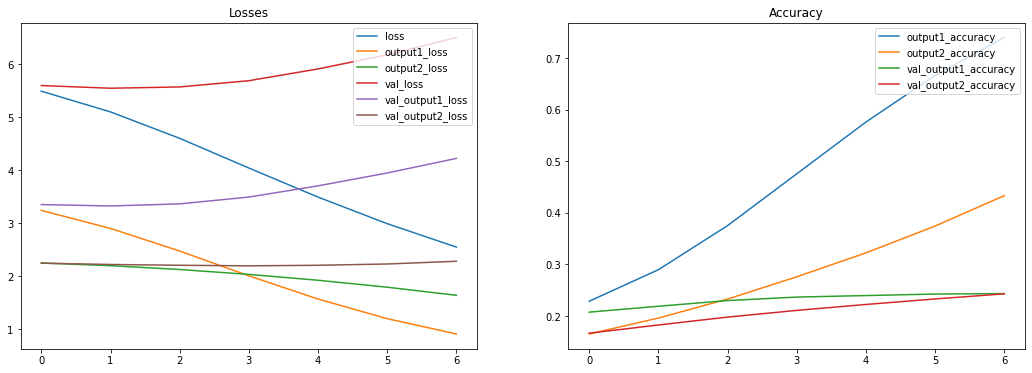

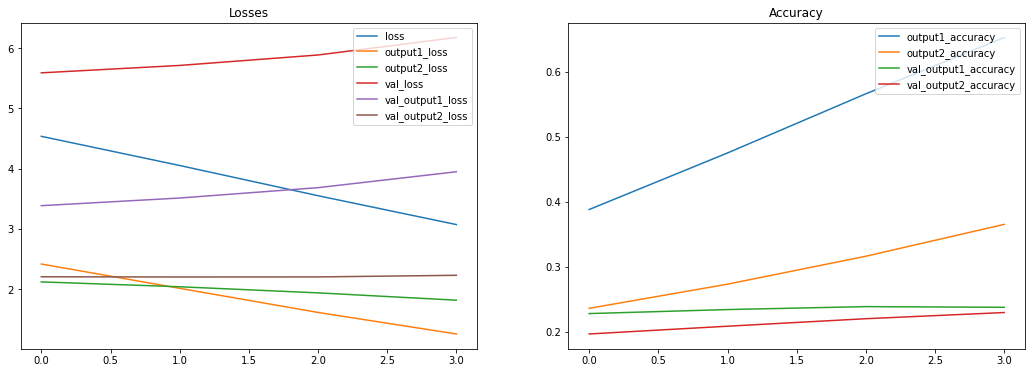

In [ ]:
for lossfile in loss_files:
    with open(lossfile, 'r') as fp:
        losses = pd.DataFrame(json.load(fp))

    _, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    losses[[c for c in losses.columns if 'loss' in c]].plot(ax=ax1)
    ax1.legend(loc='upper right')
    ax1.set_title('Losses')
    losses[[c for c in losses.columns if 'loss' not in c]].plot(ax=ax2)
    ax2.legend(loc='upper right')
    ax2.set_title('Accuracy')
    plt.show()

**This model is overfitting !**